## Exploratory Data Analysis

In [26]:
#Importing all the libraries I believe I will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from library.sb_utils import save_file
from urllib.request import urlretrieve
from pandas_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
meta_df = pd.read_csv('SourceFiles/numerical_data.csv')

In [3]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726 entries, 0 to 6725
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   metastasis            6726 non-null   int64
 1   tneg                  6726 non-null   int64
 2   invasive              6726 non-null   int64
 3   breast_chest_radi     6726 non-null   int64
 4   nodal_radi            6726 non-null   int64
 5   chemo                 6726 non-null   int64
 6   antihormone           6726 non-null   int64
 7   her2_inhib            6726 non-null   int64
 8   neo                   6726 non-null   int64
 9   er                    6726 non-null   int64
 10  pr                    6726 non-null   int64
 11  p53                   6726 non-null   int64
 12  her2                  6726 non-null   int64
 13  node_status           6726 non-null   int64
 14  age                   6726 non-null   int64
 15  menopause             6726 non-null   int64
 16  nodes 

In [4]:
meta_df.head()

,metastasis,tneg,invasive,breast_chest_radi,nodal_radi,chemo,antihormone,her2_inhib,neo,er,...,tumor_duct,tumor_lobular,size,grade,surgery_no_residual,surgery_residual,no primary site,conservation_surgery,mastectomy_surgery,no_surgery
0,0,0,1,1,0,0,1,0,0,1,...,1,0,1,2,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0,0,1,...,1,0,3,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,...,1,0,1,1,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,1,...,1,0,1,1,1,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0,1,...,1,0,1,2,1,0,0,1,0,0


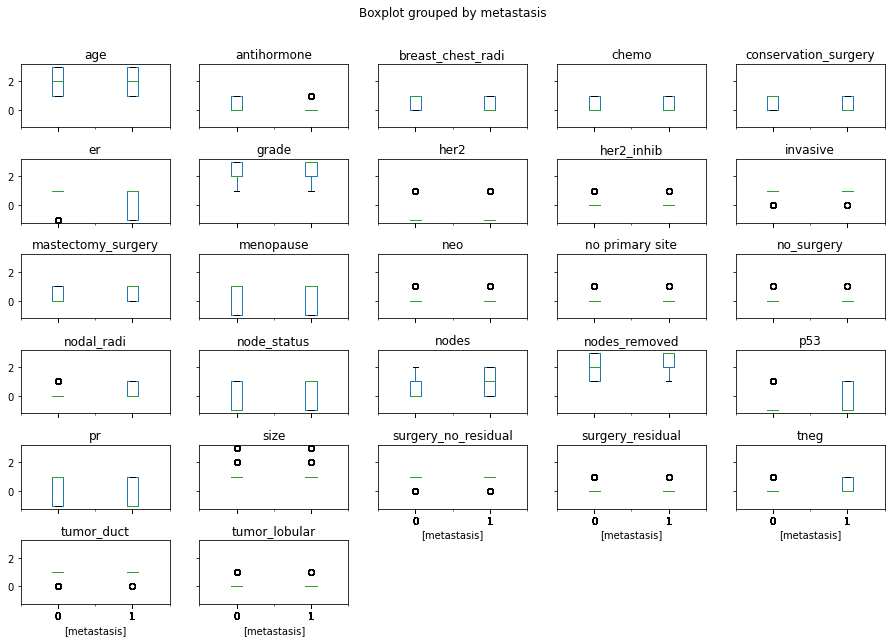

In [5]:
# Making a histogram of the metastasis variable.
meta_df.boxplot(by='metastasis',figsize=(15,10),grid=False)
plt.subplots_adjust(hspace=0.5)

In [6]:
#Let's find out the Pearson correlation coefficient
meta_df.corr()

,metastasis,tneg,invasive,breast_chest_radi,nodal_radi,chemo,antihormone,her2_inhib,neo,er,...,tumor_duct,tumor_lobular,size,grade,surgery_no_residual,surgery_residual,no primary site,conservation_surgery,mastectomy_surgery,no_surgery
metastasis,1.000000,0.179180,0.087362,-0.007081,0.173086,0.121628,-0.091165,0.046863,0.109513,-0.170249,...,0.028890,-0.028890,0.137687,0.187212,-0.111736,0.062177,0.106724,-0.131797,0.114992,0.090456
tneg,0.179180,1.000000,0.068667,0.015983,0.082163,0.174930,-0.210793,-0.060548,0.115326,-0.716939,...,0.090263,-0.090263,0.018173,0.335434,-0.044484,0.035254,0.026497,-0.027426,0.022847,0.024458
invasive,0.087362,0.068667,1.000000,0.110588,0.137860,0.144238,-0.001190,0.030137,0.037560,-0.024221,...,-0.049839,0.049839,-0.020389,-0.009571,-0.019817,0.022018,0.002189,-0.002682,0.002859,-0.000863
breast_chest_radi,-0.007081,0.015983,0.110588,1.000000,0.341139,0.099410,0.051334,0.015207,0.058786,0.019756,...,0.026664,-0.026664,-0.005744,-0.000287,0.035540,0.006068,-0.073308,0.377263,-0.364272,-0.075978
nodal_radi,0.173086,0.082163,0.137860,0.341139,1.000000,0.297598,-0.036883,0.088232,0.195555,-0.070934,...,-0.019179,0.019179,0.153287,0.136395,-0.011561,0.028093,-0.021944,-0.121231,0.126520,-0.024892
chemo,0.121628,0.174930,0.144238,0.099410,0.297598,1.000000,-0.054961,0.293579,0.357464,-0.172458,...,0.008401,-0.008401,0.093622,0.255844,-0.023590,0.039231,-0.017224,-0.117989,0.118750,-0.001374
antihormone,-0.091165,-0.210793,-0.001190,0.051334,-0.036883,-0.054961,1.000000,-0.026446,0.031373,0.286049,...,-0.087546,0.087546,-0.035690,-0.202454,0.027654,-0.012111,-0.031405,0.029335,-0.021140,-0.043340
her2_inhib,0.046863,-0.060548,0.030137,0.015207,0.088232,0.293579,-0.026446,1.000000,0.091225,-0.072734,...,0.035745,-0.035745,0.013446,0.118092,0.014747,-0.009474,-0.012154,-0.074551,0.075428,-0.002927
neo,0.109513,0.115326,0.037560,0.058786,0.195555,0.357464,0.031373,0.091225,1.000000,-0.102320,...,-0.006133,0.006133,0.065960,0.109876,-0.024580,0.039080,-0.015208,-0.067746,0.070586,-0.013306
er,-0.170249,-0.716939,-0.024221,0.019756,-0.070934,-0.172458,0.286049,-0.072734,-0.102320,1.000000,...,-0.127814,0.127814,-0.015439,-0.443342,0.026401,-0.021691,-0.014557,0.064212,-0.059851,-0.024131


[Text(0, 0.5, 'metastasis'),
 Text(0, 1.5, 'tneg'),
 Text(0, 2.5, 'invasive'),
 Text(0, 3.5, 'breast_chest_radi'),
 Text(0, 4.5, 'nodal_radi'),
 Text(0, 5.5, 'chemo'),
 Text(0, 6.5, 'antihormone'),
 Text(0, 7.5, 'her2_inhib'),
 Text(0, 8.5, 'neo'),
 Text(0, 9.5, 'er'),
 Text(0, 10.5, 'pr'),
 Text(0, 11.5, 'p53'),
 Text(0, 12.5, 'her2'),
 Text(0, 13.5, 'node_status'),
 Text(0, 14.5, 'age'),
 Text(0, 15.5, 'menopause'),
 Text(0, 16.5, 'nodes'),
 Text(0, 17.5, 'nodes_removed'),
 Text(0, 18.5, 'tumor_duct'),
 Text(0, 19.5, 'tumor_lobular'),
 Text(0, 20.5, 'size'),
 Text(0, 21.5, 'grade'),
 Text(0, 22.5, 'surgery_no_residual'),
 Text(0, 23.5, 'surgery_residual'),
 Text(0, 24.5, 'no primary site'),
 Text(0, 25.5, 'conservation_surgery'),
 Text(0, 26.5, 'mastectomy_surgery'),
 Text(0, 27.5, 'no_surgery')]

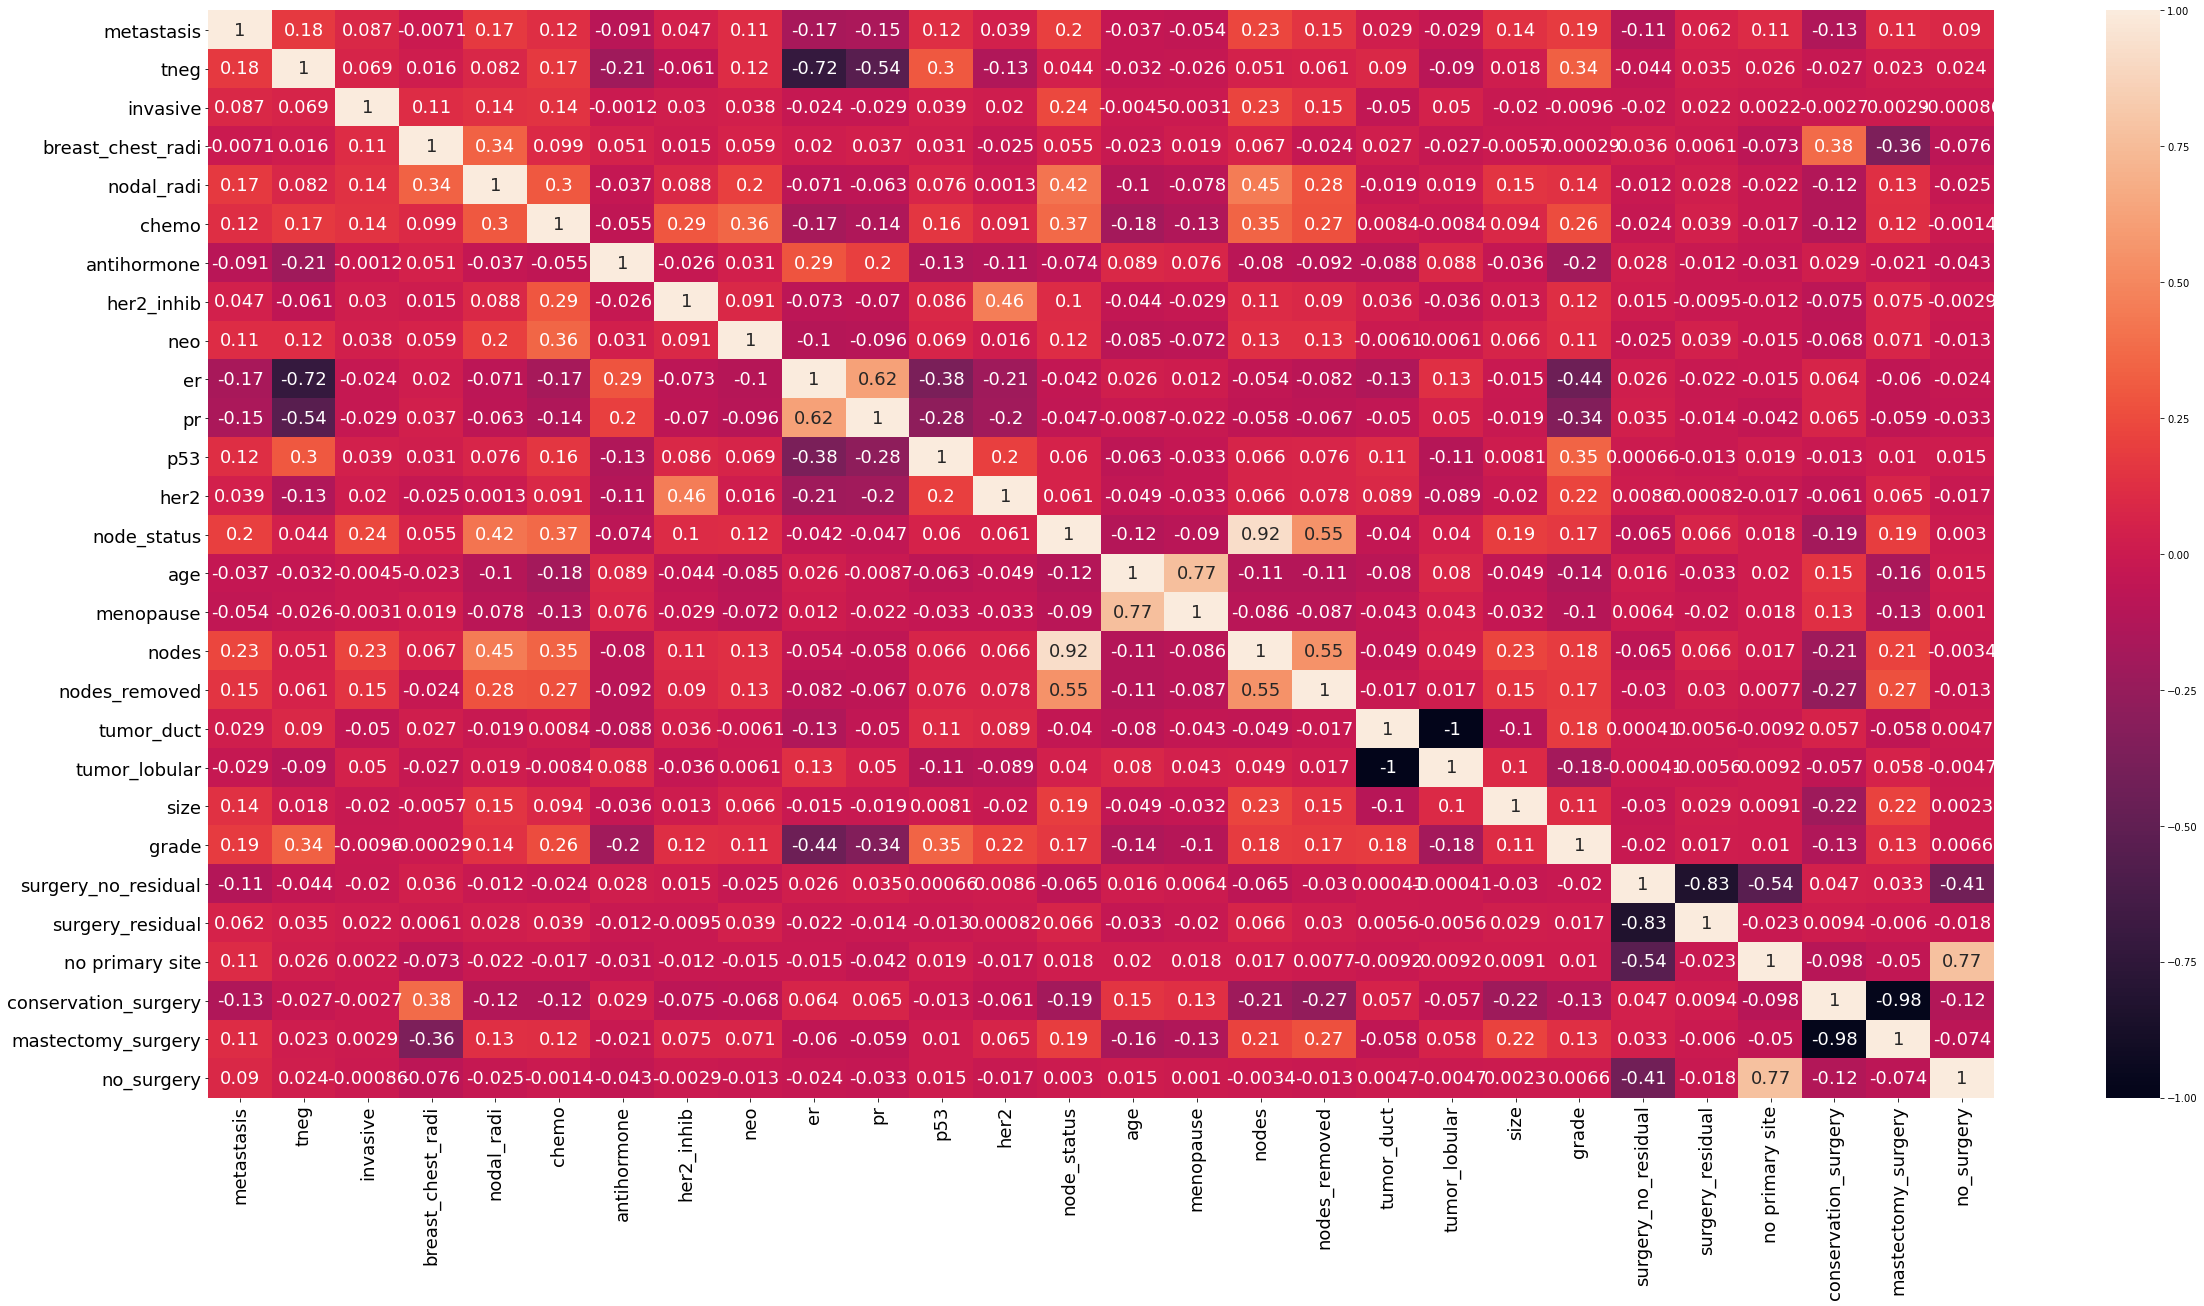

In [7]:
# Making a heatmap of the data 
plt.figure(figsize=(40,20))
_ = sns.heatmap(meta_df.corr(), annot=True, annot_kws={"size":18})
_.set_xticklabels(_.get_xmajorticklabels(), fontsize = 18)
_.set_yticklabels(_.get_ymajorticklabels(), fontsize = 18)

Too many features to be able to define which on is more relevant than the other, So let's do some PCA after scaling the data.

In [8]:
metastasis = meta_df['metastasis']
meta_df.drop(columns=['metastasis'],inplace=True)
meta_columns = meta_df.columns
meta_scale = scale(meta_df)
meta_scale_df = pd.DataFrame(meta_scale, columns=meta_columns)
meta_scale_df.head()

,tneg,invasive,breast_chest_radi,nodal_radi,chemo,antihormone,her2_inhib,neo,er,pr,...,tumor_duct,tumor_lobular,size,grade,surgery_no_residual,surgery_residual,no primary site,conservation_surgery,mastectomy_surgery,no_surgery
0,-0.344889,0.418883,0.989058,-0.368983,-0.620097,1.404804,-0.204108,-0.221663,0.481058,0.630448,...,0.297533,-0.297533,-0.326333,-0.134889,0.227145,-0.189011,-0.121597,0.800555,-0.785878,-0.094072
1,-0.344889,0.418883,-1.011063,-0.368983,1.612651,-0.711843,-0.204108,-0.221663,0.481058,0.630448,...,0.297533,-0.297533,3.811120,-1.476999,0.227145,-0.189011,-0.121597,0.800555,-0.785878,-0.094072
2,-0.344889,0.418883,0.989058,-0.368983,-0.620097,-0.711843,-0.204108,-0.221663,0.481058,0.630448,...,0.297533,-0.297533,-0.326333,-1.476999,0.227145,-0.189011,-0.121597,0.800555,-0.785878,-0.094072
3,-0.344889,0.418883,-1.011063,-0.368983,-0.620097,1.404804,-0.204108,-0.221663,0.481058,0.630448,...,0.297533,-0.297533,-0.326333,-1.476999,0.227145,-0.189011,-0.121597,0.800555,-0.785878,-0.094072
4,-0.344889,0.418883,0.989058,-0.368983,-0.620097,1.404804,-0.204108,-0.221663,0.481058,0.630448,...,0.297533,-0.297533,-0.326333,-0.134889,0.227145,-0.189011,-0.121597,0.800555,-0.785878,-0.094072


In [9]:
#let's validate the scaling by checking the means
meta_scale_df.mean()
#If it is close to zero, then I am ok

tneg                   -7.240549e-16
invasive               -2.511223e-15
breast_chest_radi       2.693223e-15
nodal_radi             -8.455753e-16
chemo                   2.496434e-16
antihormone            -1.383107e-15
her2_inhib              7.849802e-16
neo                     2.141875e-16
er                     -3.388095e-15
pr                     -1.258781e-16
p53                    -1.503670e-15
her2                    1.835301e-15
node_status             2.206548e-15
age                     2.714946e-15
menopause              -8.730519e-15
nodes                  -1.057435e-15
nodes_removed           1.348049e-15
tumor_duct             -1.881222e-15
tumor_lobular           1.826008e-15
size                    1.201537e-15
grade                   3.959234e-16
surgery_no_residual     2.426479e-15
surgery_residual       -6.909182e-16
no primary site         2.672487e-15
conservation_surgery    1.292784e-16
mastectomy_surgery     -1.416814e-15
no_surgery             -3.868201e-15
d

In [10]:
#Soemthing similar with the standard deviation, using the biased estimate
meta_scale_df.std(ddof=0)

tneg                    1.0
invasive                1.0
breast_chest_radi       1.0
nodal_radi              1.0
chemo                   1.0
antihormone             1.0
her2_inhib              1.0
neo                     1.0
er                      1.0
pr                      1.0
p53                     1.0
her2                    1.0
node_status             1.0
age                     1.0
menopause               1.0
nodes                   1.0
nodes_removed           1.0
tumor_duct              1.0
tumor_lobular           1.0
size                    1.0
grade                   1.0
surgery_no_residual     1.0
surgery_residual        1.0
no primary site         1.0
conservation_surgery    1.0
mastectomy_surgery      1.0
no_surgery              1.0
dtype: float64

In [11]:
meta_pca = PCA().fit(meta_scale_df)

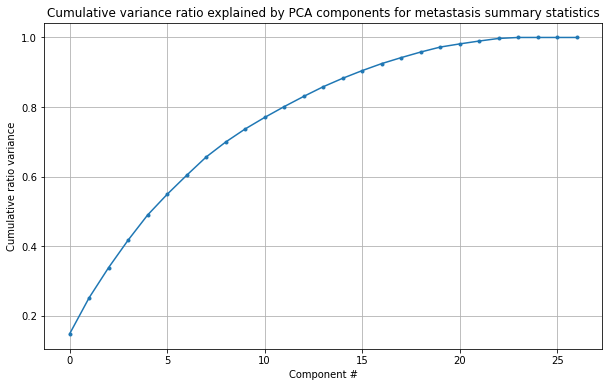

In [16]:
plt.subplots(figsize=(10, 6))
plt.plot(meta_pca.explained_variance_ratio_.cumsum(), marker='.')
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.grid()
plt.title('Cumulative variance ratio explained by PCA components for metastasis summary statistics');

The fisrt 7 components makes up for 60% of the variance. by the 12th component, we get the 80% and by the 16th we got the 90% of the variance

In [76]:
#Transforming the pca to obtain the derived features
meta_pca_x = meta_pca.transform(meta_scale_df)

In [77]:
pca_df = pd.DataFrame(meta_pca_x, columns=meta_columns)
pca_df['metastasis'] = metastasis

In [112]:
def boxplots(columns, ncol=None, figsize=(10,35)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns)/ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize,squeeze=False)
    fig.subplots_adjust(wspace=0.6, hspace=0.4)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        pca_df.boxplot(column=col, by='metastasis', ax=ax)
        ax.set(xlabel='metastasis', ylabel=col+'('+str(i)+')')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

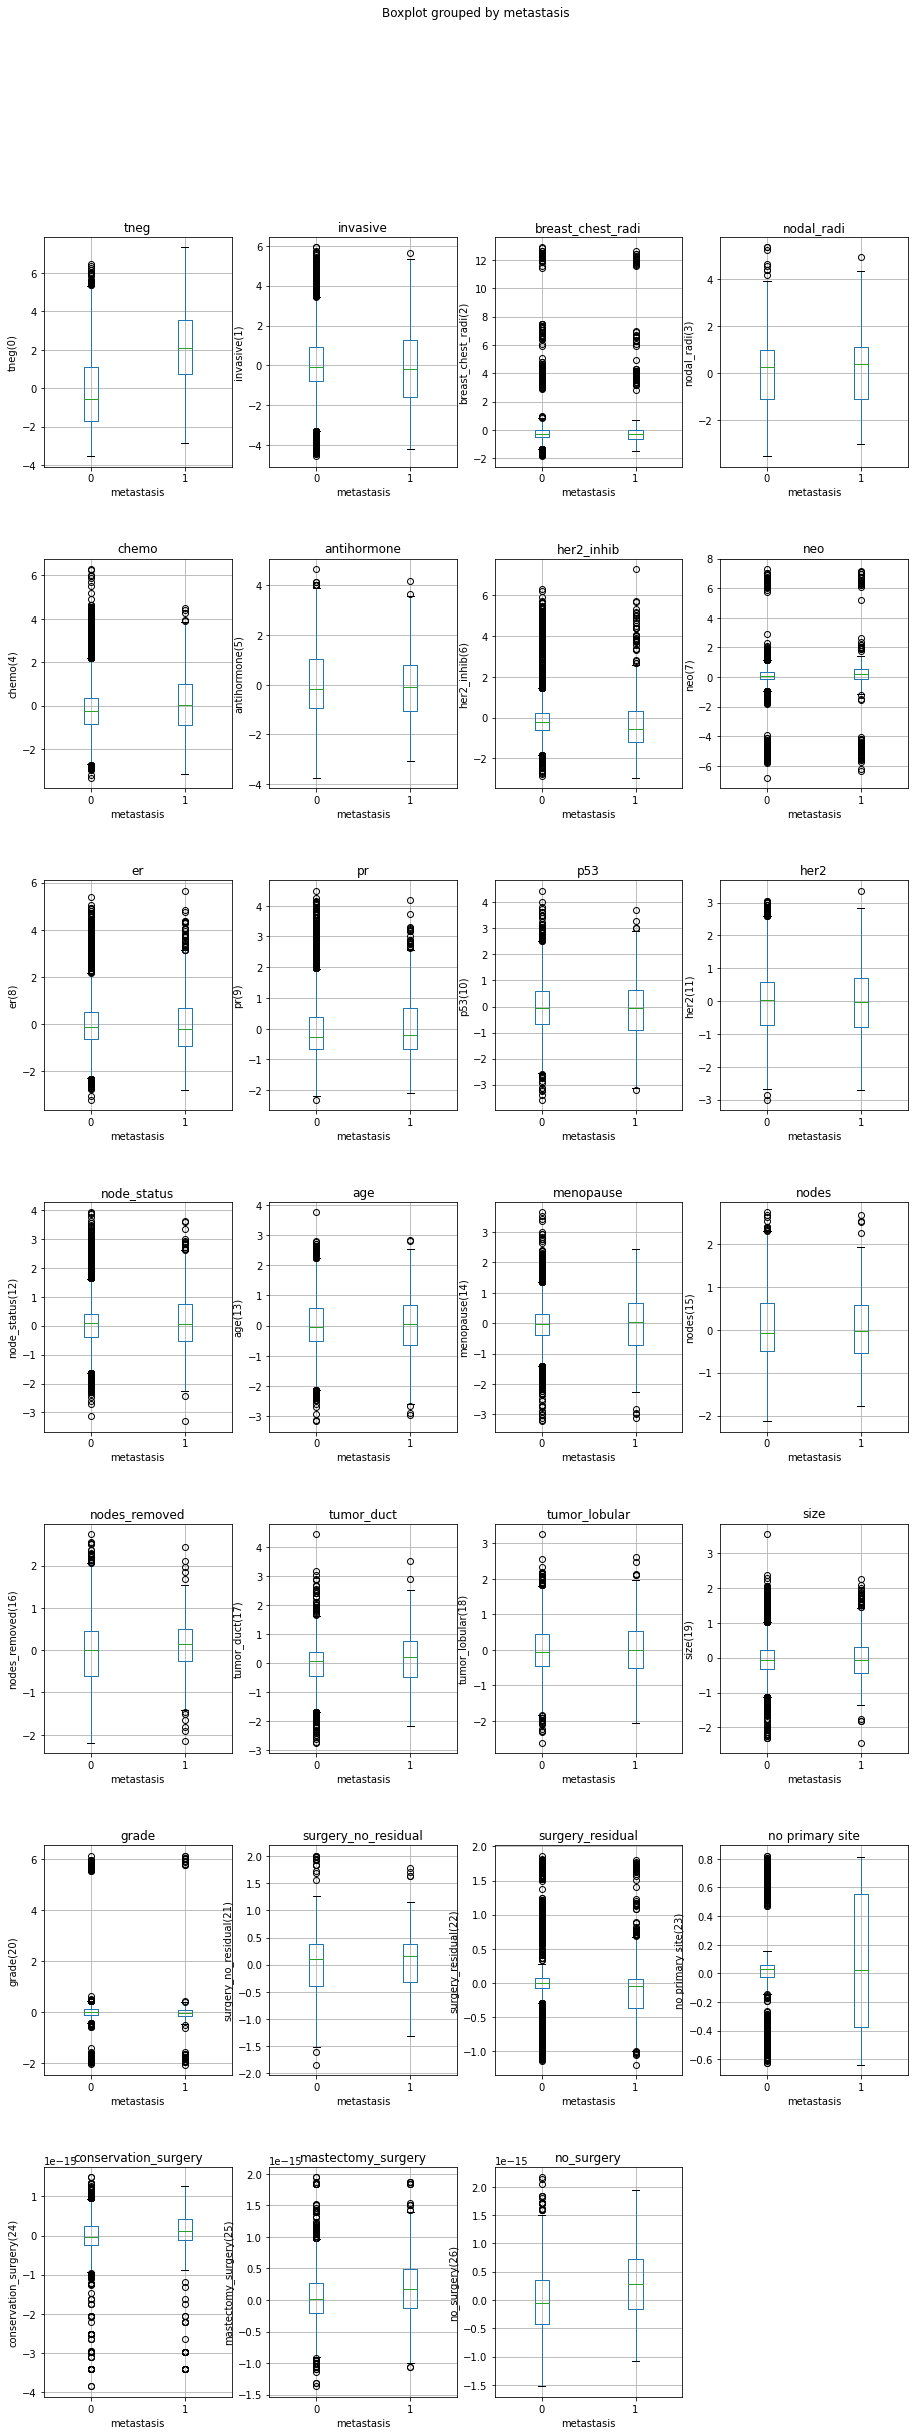

In [116]:
#In these boxes we can appreciate which components influence more in the metastasis of the cancer
boxplots(meta_columns, 4, figsize=(15,40))

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Metastasis summary PCA, 25.1% variance explained')

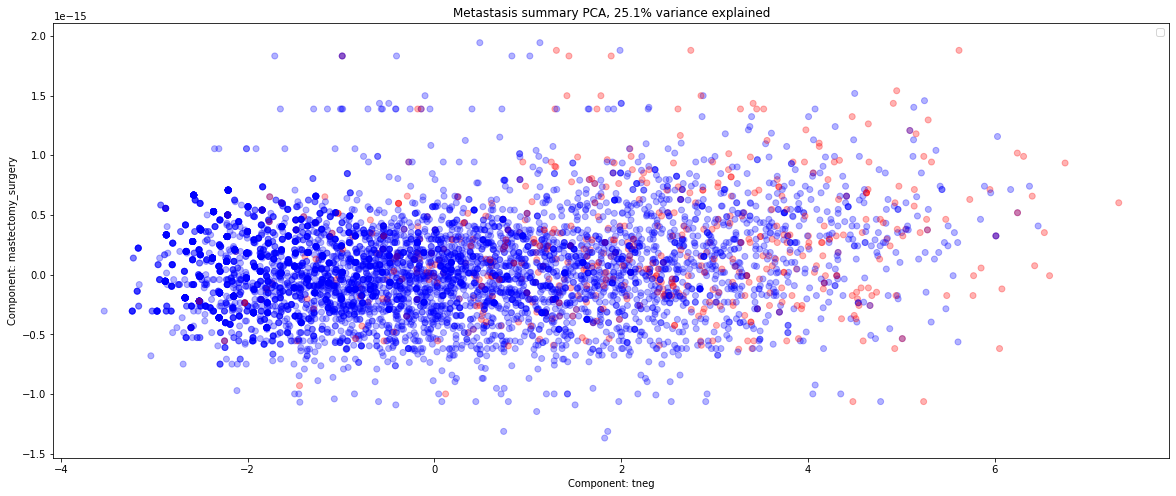

In [97]:
#Based on the previous plots, we can validate the distribution of 2 components, for example, we can plot
#the tneg and having a mastectomy
f1 = 0 #this is the tneg feature
f2 = 25 #This is the mastectomy feature
x = meta_pca_x[:,f1]
y = meta_pca_x[:,f2]
#We will use the variable metastasis here as well
pc_var = 100 * meta_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(20,8))
color={0:'blue',1:'red'}
plt.scatter(x=x,y=y,c=metastasis.map(color),alpha=0.3)
plt.xlabel('Component: '+meta_columns[f1])
plt.ylabel('Component: '+meta_columns[f2])
plt.legend()
plt.title(f'Metastasis summary PCA, {pc_var:.1f}% variance explained')